<a href="https://colab.research.google.com/github/micvet/intensivo-python-hash/blob/main/Mini_projeto_Data_science_Hashtag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Executar para dar permissão de acesso do Colab ao documento. 
#O documento deverá estar na pasta do Google Drive indicada na variavel "Tabela".
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [5]:
import pandas as pd
tabela = pd.read_csv('/content/drive/MyDrive/Arquivos intensiváo/advertising.csv')
display(tabela)
print (tabela.info())



,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


### Agora vamos fazer as análises usando matplotlib e seaborn

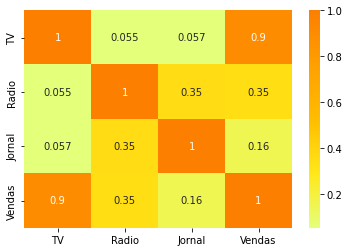

In [6]:
#Criar o gráfico
import matplotlib.pyplot as plt
import seaborn as sns


#Criar o gráfico
sns.heatmap(tabela.corr(), cmap='Wistia', annot= True)
#Tabela de cores Wistia é de fácil vizualização; annot True mostra números referentes à correlação;

#exibir o gráfico
plt.show()


###Separar a base de dados em dados de treino e teste para IA 

In [7]:
#Separar dados em X e Y

y = tabela ["Vendas"] #previsão
x = tabela [["TV","Radio","Jornal"]] #quem usamos para previsão. [[]] Se houver mais de uma coluna

# Separar dados em treino e tesrte com o sklearn

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y) #manter sempre a mesma ordem de x e y teste/treino.



###Por ser um problema que envolve regressão, vamos usar os modelos RandomForest (árvore de decisão) e regressão linear

In [8]:
#importando os modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressao = LinearRegression()
modelo_arvore = RandomForestRegressor()

#treinando inteligências
modelo_regressao.fit(x_treino, y_treino)
modelo_arvore.fit(x_treino, y_treino)

RandomForestRegressor()

###Teste de IA e avaliação do melhor modelo

In [9]:
previsao_regressao = modelo_regressao.predict(x_teste)
previsao_arvore = modelo_arvore.predict(x_teste)

#importar R² para calcular melhor previsão
from sklearn import metrics

print (metrics.r2_score(y_teste, previsao_regressao))
print (metrics.r2_score(y_teste, previsao_arvore))

0.9097377691027635
0.9181772539503248


### O modelo de Árvore de decisão se mostrou melhor. Se a porcentagem está ou não de acordo com o proposto, depende muito do caso.

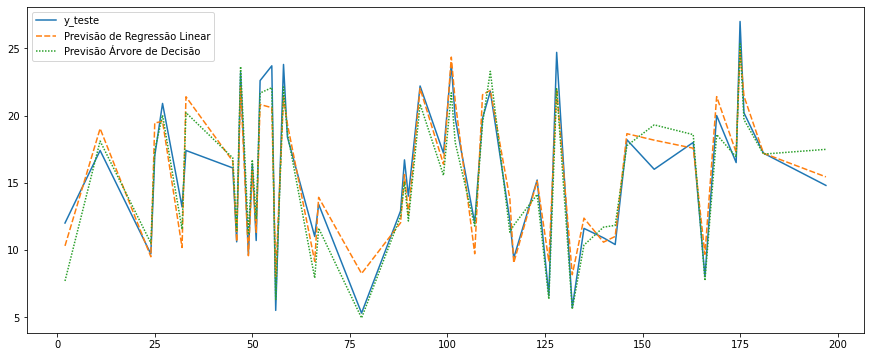

In [17]:
#Criando uma tabela com os dados de teste e previsões
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar ['y_teste'] = y_teste
tabela_auxiliar ['Previsão de Regressão Linear'] = previsao_regressao
tabela_auxiliar ['Previsão Árvore de Decisão'] = previsao_arvore

#criando um gráfico com os dados
plt.figure(figsize=(15,6)) #definindo tamanho da vizualização
sns.lineplot(data=tabela_auxiliar)
plt.show()


###Realizando previsão com novos dados, utilizando o modelo criado


In [20]:
novos = pd.read_csv('/content/drive/MyDrive/Arquivos intensiváo/novos.csv')
display (novos)

previsao = modelo_arvore.predict(novos)

print (previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.289  7.954 20.582]
